In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('out_method_sparse_vs_dense.txt',sep=',')
data = pd.DataFrame(data)
#data=data.set_index("")
data.index+=1
df1=data[:-1]
df2=data[len(data)-1:]
df2=df2.set_index("framenum")

<IPython.core.display.Javascript object>


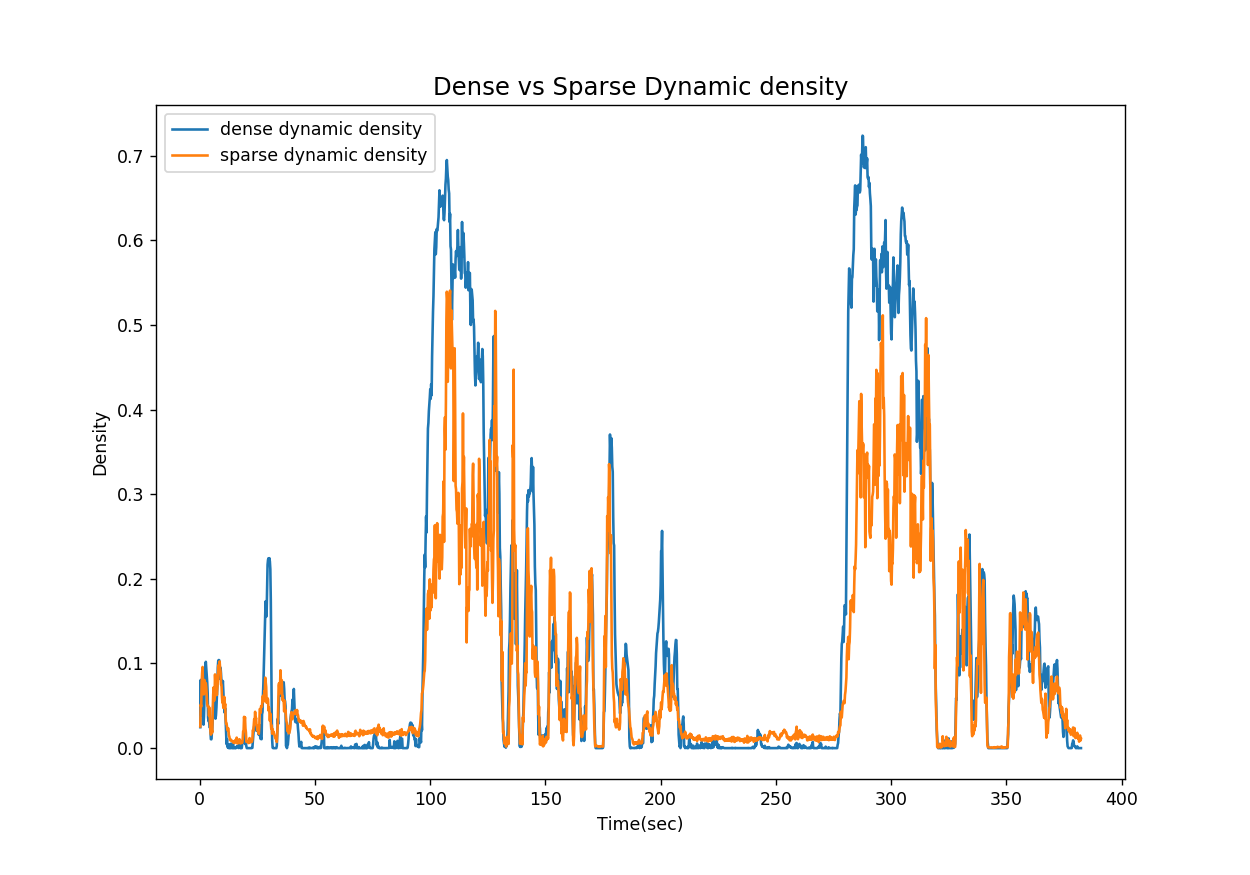

In [3]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7))
plt.plot(df1["dense dynamic density"])
plt.plot(df1["sparse dynamic density"])
plt.ylabel('Density')
plt.xlabel('Time(sec)')
ax=plt.gca()
ax.set_xticklabels([0,0,50,100,150,200,250,300,350,400])
plt.title('Dense vs Sparse Dynamic density',fontsize=14)
plt.legend(labels=["dense dynamic density","sparse dynamic density"])
#plt.savefig('method_extra_1.png')

<IPython.core.display.Javascript object>


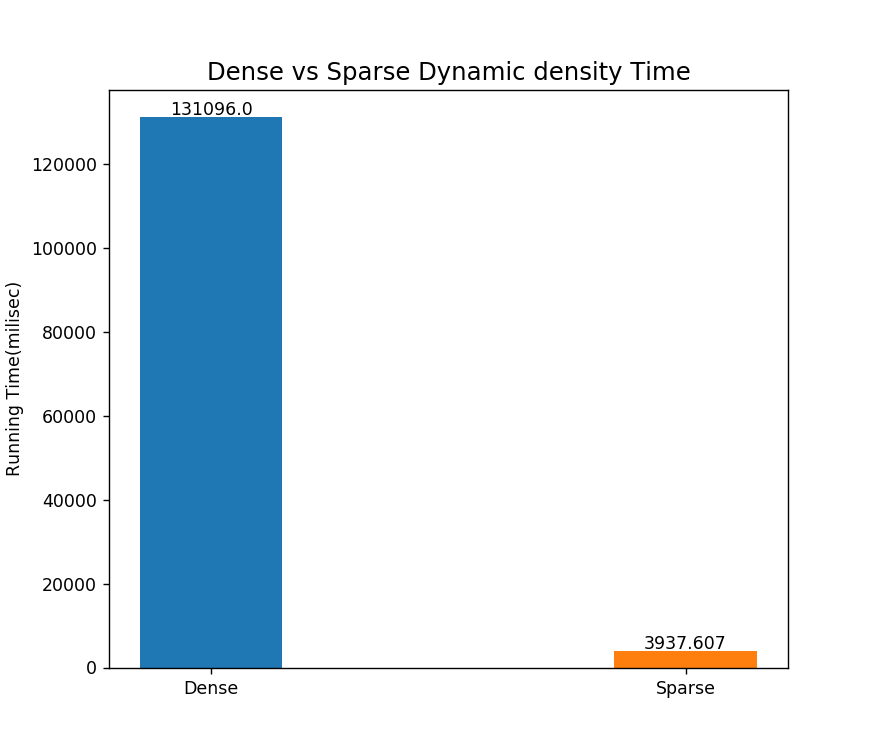

In [4]:
fig = plt.figure(figsize=(7,6))
width = 0.3
plt.bar("Dense",df2["dense dynamic density"],width)
plt.bar("Sparse",df2["sparse dynamic density"],width)
plt.ylabel('Running Time(milisec)')
plt.title('Dense vs Sparse Dynamic density Time',fontsize=14)
for i, v in enumerate(df2.iloc[0]):
    plt.text(x=i,y=v+500,s=v,fontdict=dict(fontsize=10),ha='center')
#plt.savefig('method_extra_2.png')

In [6]:
#Error Calculation
for i in df1.index:
    df1.loc[i,"error"]=(df1.loc[i,"dense dynamic density"]-df1.loc[i,"sparse dynamic density"])**2
x=sum(df1["error"])
print((x/len(df1))**0.5)

0.11699396410340102


<IPython.core.display.Javascript object>


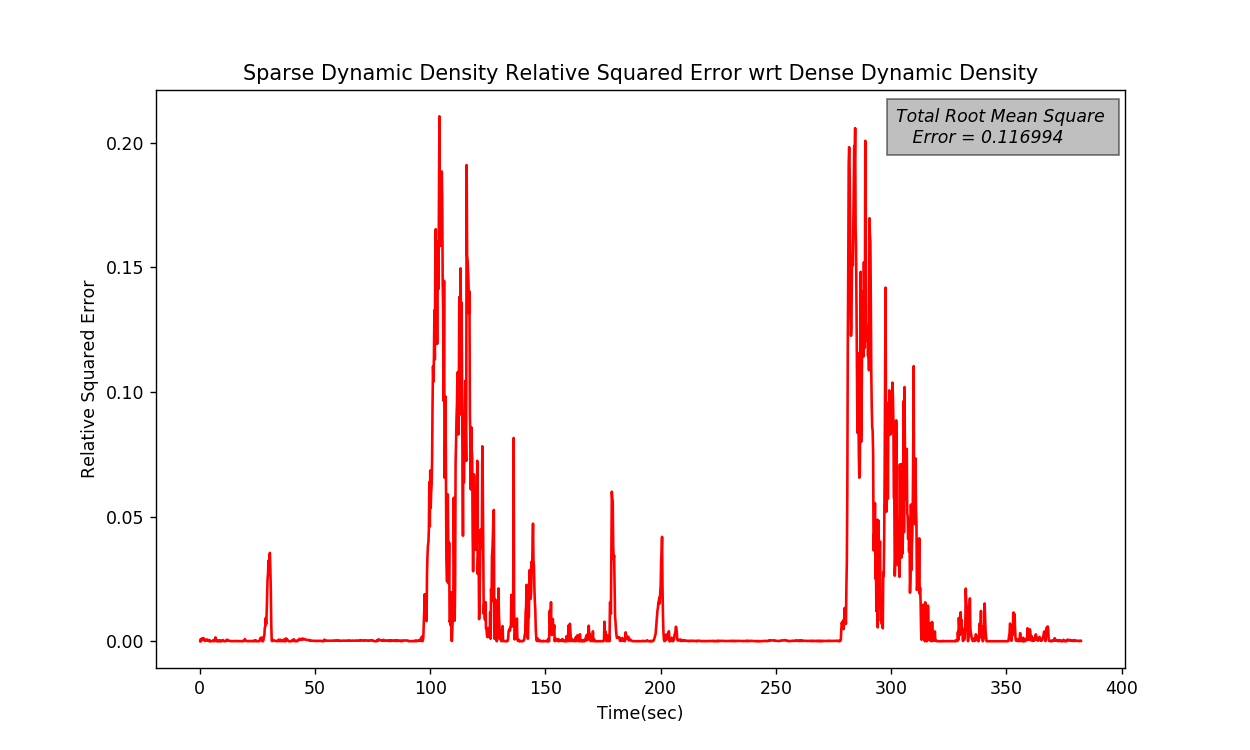

In [33]:
fig = plt.figure(figsize=(10,6))
plt.plot(df1["error"],color='red')
plt.ylabel('Relative Squared Error')
plt.xlabel('Time(sec)')
ax=plt.gca()
ax.set_xticklabels([0,0,50,100,150,200,250,300,350,400])
plt.title('Sparse Dynamic Density Relative Squared Error wrt Dense Dynamic Density',fontsize=12)
ax.text(1510, 0.20, 'Total Root Mean Square \n   Error = 0.116994', style='italic', fontsize=10, bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5})
plt.savefig('method_extra_3.png')